In [1]:
from wlclassifier import WLClassifier
from c2 import *
import networkx as nx

from sklearn.model_selection import train_test_split

In [2]:
from cProfile import Profile
from pstats import SortKey, Stats

We condsider the formula $\exists x\exists^{\geq 7}y E(x, y)$ and 100 binomial graphs with n=10, p=0.5.

In [3]:
phi = Exists(Var.x, (Exists(Var.y, E(Var.x, Var.y), 7)))

X = [nx.fast_gnp_random_graph(10, 0.5) for _ in range(100)]
y = [phi.evaluate(g) for g in X]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y.count(True)

66

First we fit a classifier that checks for occurrences of exact colors. 

In [4]:
clf = WLClassifier(depth=2, comparisons=[lambda x, y: x == y])
with Profile() as prof:
    clf.fit(X_train, y_train)
    (
        Stats(prof)
        .strip_dirs()
        .sort_stats(SortKey.CUMULATIVE)
        .print_stats(20)
    )

         4639337 function calls (1299602 primitive calls) in 2.105 seconds

   Ordered by: cumulative time
   List reduced from 204 to 20 due to restriction <20>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    2.105    2.105 wlclassifier.py:129(fit)
        1    0.000    0.000    1.777    1.777 wlclassifier.py:82(_transform)
        1    0.000    0.000    1.777    1.777 wlclassifier.py:89(<listcomp>)
       80    0.061    0.001    1.777    0.022 wlclassifier.py:90(<listcomp>)
    34560    0.121    0.000    1.687    0.000 wlclassifier.py:91(<listcomp>)
   345600    0.139    0.000    1.566    0.000 3656221039.py:1(<lambda>)
3552727/363721    1.452    0.000    1.452    0.000 wlclassifier.py:274(__eq__)
        1    0.000    0.000    0.324    0.324 wlclassifier.py:43(_set_training_data)
     2402    0.009    0.000    0.268    0.000 {built-in method builtins.sorted}
    10789    0.006    0.000    0.248    0.000 wlclassifier.py:334(__lt

Accuracy: 1.0


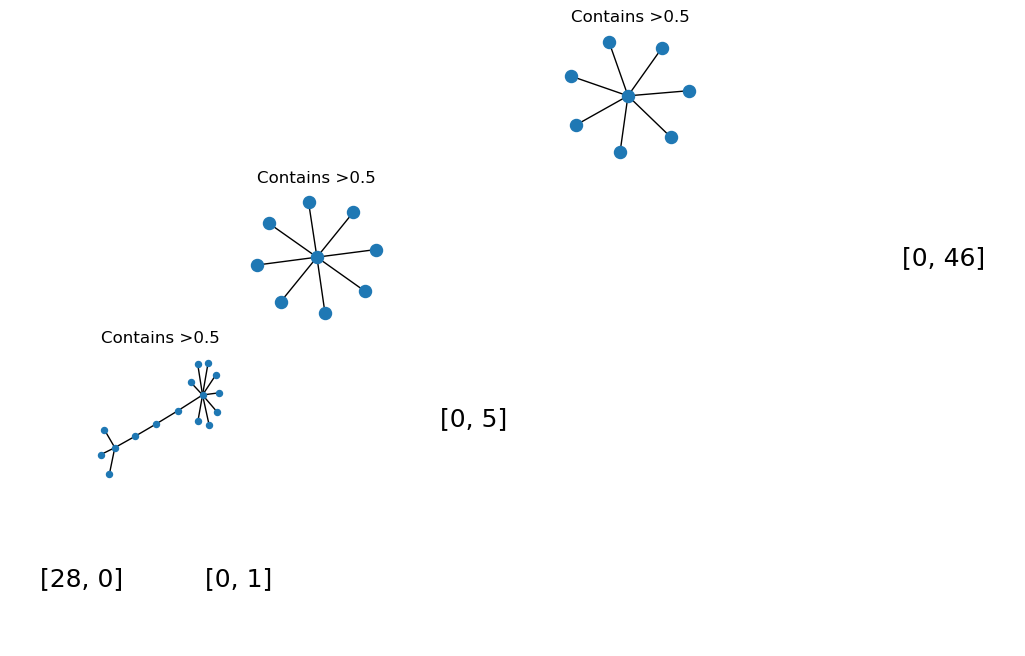

In [5]:
print("Accuracy:", clf.score(X_test, y_test))
clf.draw()

Next we check for occurrences of supercolors:

In [6]:
clf = WLClassifier(depth=2, comparisons=[lambda x, y: x >= y])
with Profile() as prof:
    clf.fit(X_train, y_train)
    (
        Stats(prof)
        .strip_dirs()
        .sort_stats(SortKey.CUMULATIVE)
        .print_stats(20)
    )

         28022421 function calls (21549019 primitive calls) in 12.530 seconds

   Ordered by: cumulative time
   List reduced from 203 to 20 due to restriction <20>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000   12.530   12.530 wlclassifier.py:129(fit)
        1    0.000    0.000   12.225   12.225 wlclassifier.py:82(_transform)
        1    0.000    0.000   12.225   12.225 wlclassifier.py:89(<listcomp>)
       80    0.091    0.001   12.225    0.153 wlclassifier.py:90(<listcomp>)
    34560    0.169    0.000   12.092    0.000 wlclassifier.py:91(<listcomp>)
3650733/356389    6.898    0.000   11.948    0.000 wlclassifier.py:298(__ge__)
   345600    0.187    0.000   11.924    0.000 3743835767.py:1(<lambda>)
3277209/192404    2.372    0.000   11.210    0.000 wlclassifier.py:307(<listcomp>)
 13890454    1.405    0.000    1.405    0.000 {built-in method builtins.len}
  3277210    0.727    0.000    0.727    0.000 {built-in method builtins.

Accuracy: 1.0


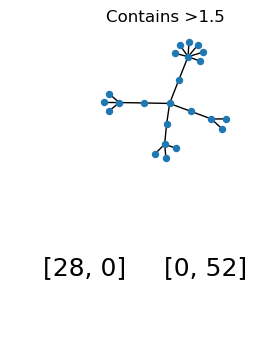

In [7]:
print("Accuracy:", clf.score(X_test, y_test))
clf.draw()

In [8]:
clf = WLClassifier(depth=2, comparisons=[lambda x, y: x >= y], nb=True)
with Profile() as prof:
    clf.fit(X_train, y_train)
    (
        Stats(prof)
        .strip_dirs()
        .sort_stats(SortKey.CUMULATIVE)
        .print_stats(20)
    )

         28022329 function calls (21548930 primitive calls) in 11.834 seconds

   Ordered by: cumulative time
   List reduced from 204 to 20 due to restriction <20>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000   11.834   11.834 wlclassifier.py:129(fit)
        1    0.000    0.000   11.474   11.474 wlclassifier.py:82(_transform)
        1    0.000    0.000   11.474   11.474 wlclassifier.py:89(<listcomp>)
       80    0.074    0.001   11.474    0.143 wlclassifier.py:90(<listcomp>)
    34560    0.149    0.000   11.364    0.000 wlclassifier.py:91(<listcomp>)
3650733/356389    6.535    0.000   11.310    0.000 wlclassifier.py:298(__ge__)
   345600    0.169    0.000   11.215    0.000 2932536821.py:1(<lambda>)
3277209/192404    2.233    0.000   10.623    0.000 wlclassifier.py:307(<listcomp>)
 13890461    1.359    0.000    1.359    0.000 {built-in method builtins.len}
  3277211    0.687    0.000    0.687    0.000 {built-in method builtins.

In [9]:
print("Accuracy:", clf.score(X_test, y_test))

Accuracy: 1.0


In [11]:
phi = Exists(Var.x, (Exists(Var.y, Not(E(Var.x, Var.y)), 4)))

X = [nx.fast_gnp_random_graph(10, 0.9) for _ in range(100)]
y = [phi.evaluate(g) for g in X]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y.count(True)

83